In [1]:
from TO_sim.get_simul import get_r_y
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [25]:
K = 0
seed = 11
N = 5000
m = 6
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
Y = np.r_[theta_random,theta_random]

In [18]:
r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd,y_,avg_theta,c_s = get_r_y(K,m,Y,omega,N)

SystemError: CPUDispatcher(<function RK4_short_theta_store_r_y at 0x118009c60>) returned a result with an exception set

In [ ]:
Ks = np.arange(0,15,0.01)
r0s = []
rps = []
rms = []
rss = []

rpls = []
rmls = []
N0s = []
NPs = []
NMs = []

c_ss = []
avg_thetas = []
y_s = []

for K in tqdm(Ks):
    r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd,Y,avg_theta,c_s = get_r_y(K,m,Y,omega,N,tend=5000)
    r0s.append(r0)
    rps.append(rp)
    rms.append(rm)
    rss.append(rs)
    rpls.append(rpl)
    rmls.append(rml)
    N0s.append(N0)
    NPs.append(NP)
    NMs.append(NM)
    c_ss.append(c_s)
    avg_thetas.append(avg_theta)
    y_s.append(Y.copy())

100%|██████████| 300/300 [1:05:46<00:00, 13.15s/it]


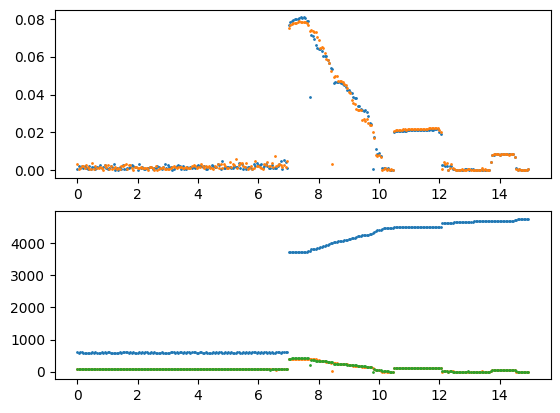

In [21]:
plt.subplot(211)

# plt.scatter(Ks,r0s,s=1)
# plt.scatter(Ks,rms,s=1)
# plt.scatter(Ks,rps,s=1)

plt.scatter(Ks,rmls,s=1)
plt.scatter(Ks,rpls,s=1)


plt.subplot(212)
plt.scatter(Ks,N0s,s=1)
plt.scatter(Ks,NPs,s=1)
plt.scatter(Ks,NMs,s=1)


In [22]:
avg_thetas = np.array(avg_thetas)

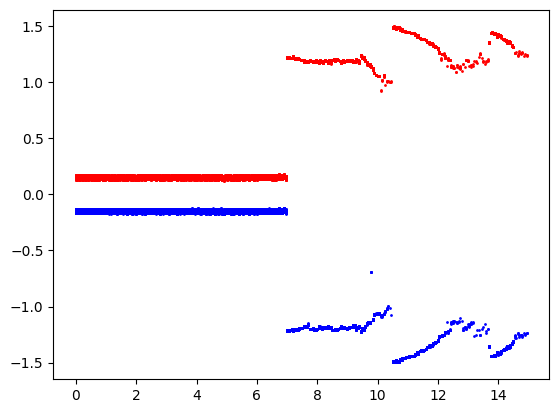

In [23]:
for i,c_s in enumerate(c_ss):
    P_v = avg_thetas[i][c_s['+l']]
    M_v = avg_thetas[i][c_s['-l']]
    plt.scatter(Ks[i]*np.ones(len(P_v)),P_v,color='r',s=1);
    plt.scatter(Ks[i]*np.ones(len(M_v)),M_v,color='b',s=1);

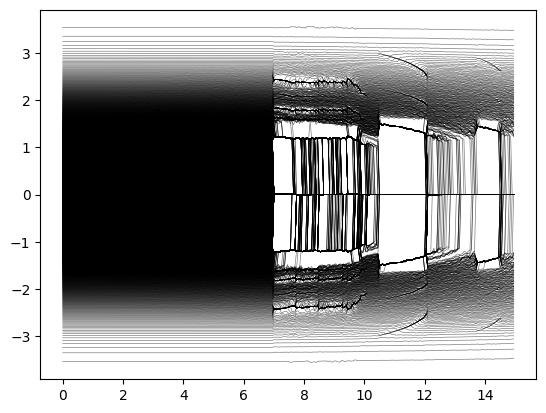

In [24]:
plt.plot(Ks,avg_thetas,c='k',alpha=0.5,lw=0.5);


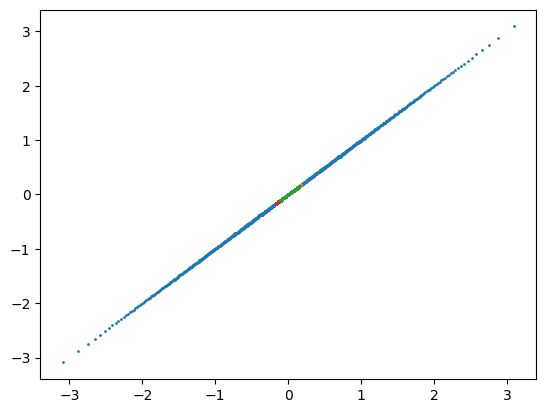

In [41]:
plt.scatter(omega,avg_theta,s=1)
# plt.scatter(omega[c_s['+']],avg_theta[c_s['+']],s=1)
plt.scatter(omega[c_s['+l']],avg_theta[c_s['+l']],s=1)
plt.scatter(omega[c_s['0']],avg_theta[c_s['0']],s=1)
# plt.scatter(omega[c_s['-']],avg_theta[c_s['-']],s=1)
plt.scatter(omega[c_s['-l']],avg_theta[c_s['-l']],s=1)
